#Team Details :
## CS23MTECH11020 - Suryansh Gautam
## CS23MTECH11008 - V Harikrishnan
## CS23MTECH11029 - Patel Heetkumar D.
## CS23MTECH13001 - Anil kumar Sharma
## CS23MTECH13002 - KR Anuraj


Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [ ]:
import networkx as nx
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display
from PIL import Image

Reading dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Payments.csv')

Creating weighted directional graph

In [ ]:
G = nx.DiGraph()
for index, row in df.iterrows():
    sender = row['Sender']
    receiver = row['Receiver']
    amount = row['Amount']

    if G.has_edge(sender, receiver):
        G[sender][receiver]['weight'] += np.log(amount)
    else:
        G.add_edge(sender, receiver, weight=np.log(amount))

creating adjacenc matrix

In [ ]:
n = len(G.nodes())
A = nx.adjacency_matrix(G)
knn_num = 15
A_dense = A.todense()
for i in range(A_dense.shape[0]):
    top_n_indices = np.argpartition(A_dense[i], -knn_num)[-knn_num:]
    mask = np.zeros_like(A_dense[i])
    mask[top_n_indices] = 1
    A_dense[i] = mask

In [ ]:
len(G.edges)

5358

Calculating laplacian norm

In [ ]:
degrees = np.sum(A_dense, axis=0)
D = np.diag(degrees)
laplacian = D - A_dense
degrees = np.where(degrees == 0, 1, 1/np.sqrt(degrees))
D = np.diag(degrees)
D_inv = D
degrees.max()

<ipython-input-59-bc5eed537ec3>:6: RuntimeWarning: divide by zero encountered in divide
  degrees = np.where(degrees == 0, 1, 1/np.sqrt(degrees))


1.0

In [ ]:
temp = np.dot(D_inv, A_dense)
temp = np.dot(temp, D_inv)
laplacian_norm = np.eye(n) - temp

Calculating lowest n eigenvalues and storing corresponding eigenvectors to embeddings

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_norm)
dim = 2
indices = np.argsort(eigenvalues)
embeddings = eigenvectors[:, indices]
embeddings = embeddings[:, 1:dim + 1]

In [ ]:
embeddings
embeddings.shape

(799, 2)

Fitting k means on generated embeddings

In [ ]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting PCA on generated embeddings

In [ ]:
pca = PCA(n_components=2)
dim_2 = pca.fit_transform(embeddings)

Plotting the clusters that are generated using spectral method

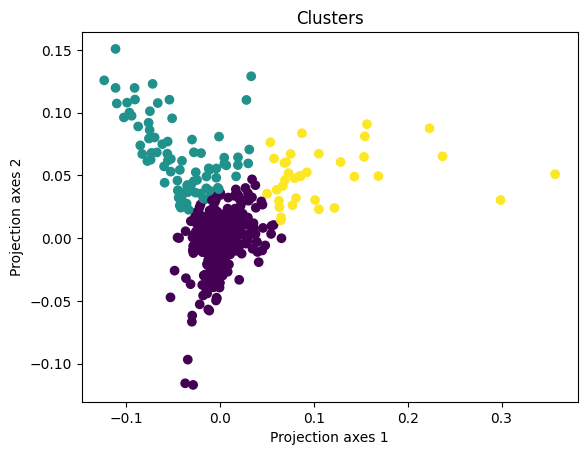

In [ ]:
plt.scatter(dim_2[:, 0], dim_2[:, 1], c=labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Projection axes 1')
plt.ylabel('Projection axes 2')
plt.show()